In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Read the Dataframe

In [2]:
#import the dataset
df = pd.read_csv('C:/Users/Maha/Desktop/MLP1.csv', encoding='latin1')
#Checking the data
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,1,1,1303862400,'Good Quality Dog Food','I have bought several of the Vitality canned ...,5
1,3,3,1307923200,'Cough Medicine','If you are looking for the secret ingredient ...,2
2,0,0,1350777600,'Great taffy','Great taffy at a great price There was a wid...,5
3,0,0,1342051200,'Nice Taffy','I got a wild hair for taffy and ordered this ...,4
4,0,0,1340150400,'Great Just asgoodas the expensive brands','This saltwater taffy had great flavors and wa...,5


In [3]:
#Checking the shape
df.shape

(1329, 6)

# Step 2: Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [5]:
import pandas as pd
# Assuming the CSV file is in the correct path
df = pd.read_csv('C:\\Users\\Maha\\Desktop\\MLP1.csv', encoding='latin1')

In [6]:
# Product Scores
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise", marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

### Create some wordclouds to see the most frequently used words in the reviews.

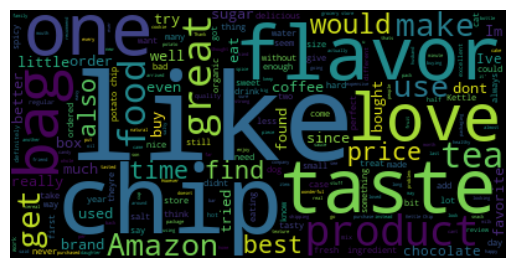

In [7]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

#Creating Stopwords list
stopwords = set(stopwords.words('english'))
stopwords.update(["br","href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Step 3: Classifying Tweets

In [8]:
# Mapping values to sentiment categories
sentiment_mapping = {
    1: 'Negative',
    2: 'Negative',
    3: 'Neutral',
    4: 'Positive',
    5: 'Positive'
}
# Creating a new 'Sentiment' column based on the mapping
df['Sentiment'] = df['Score'].map(sentiment_mapping)
# Displaying the updated DataFrame
print(df[['Score', 'Sentiment']].head())
df.head()

   Score Sentiment
0      5  Positive
1      2  Negative
2      5  Positive
3      4  Positive
4      5  Positive


,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Sentiment
0,1,1,1303862400,'Good Quality Dog Food','I have bought several of the Vitality canned ...,5,Positive
1,3,3,1307923200,'Cough Medicine','If you are looking for the secret ingredient ...,2,Negative
2,0,0,1350777600,'Great taffy','Great taffy at a great price There was a wid...,5,Positive
3,0,0,1342051200,'Nice Taffy','I got a wild hair for taffy and ordered this ...,4,Positive
4,0,0,1340150400,'Great Just asgoodas the expensive brands','This saltwater taffy had great flavors and wa...,5,Positive


# Step 4: More Data Analysis

In [9]:
# split df - positive, neutral, and negative sentiment:
positive = df[df['Sentiment'] == 1]
neutral = df[df['Sentiment'] == 0]
negative = df[df['Sentiment'] == -1]

positive = positive.dropna()
neutral = neutral.dropna()
negative = negative.dropna()

##  Distribution of reviews with sentiment across the dataset

In [10]:
# Mapping values to sentimentt categories
df['sentimentt'] = df['Sentiment'].replace({-1: 'negative', 0: 'neutral', 1: 'positive'})

# Create histogram
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred", marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

# Step 5: Building the Model

## Data Cleaning

In [11]:
# Data Cleaning
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"'))
    return final

df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

# Splitting Dataframe
dfNew = df[['Summary', 'Sentiment']]
dfNew.head()

,Summary,Sentiment
0,'Good Quality Dog Food',Positive
1,'Cough Medicine',Negative
2,'Great taffy',Positive
3,'Nice Taffy',Positive
4,'Great Just asgoodas the expensive brands',Positive


# Cross Validation

## Feature extraction using CountVectorizer


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Summary'])

## Classifiers

In [13]:
# Dimensionality Reduction
svd = TruncatedSVD(n_components=500)
X_matrix = svd.fit_transform(X)

# Mapping values to sentiment categories
sentiment_mapping = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
df['Sentiment'] = df['Score'].map(sentiment_mapping)

# Creating Bag of Words
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_matrix = vectorizer.fit_transform(df['Summary'])

In [14]:
# Dimensionality Reduction
svd = TruncatedSVD(n_components=500)
X_matrix = svd.fit_transform(X_matrix)

# Randomized Search for Random Forest
param_dist_rf = {'n_estimators': [50, 100, 150, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

randomized_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, cv=5, n_iter=10)

# Random Forest Optimization with Randomized Search
rf = RandomForestClassifier()
randomized_rf.fit(X_matrix, df['Sentiment'])
best_rf = randomized_rf.best_estimator_

# Logistic Regression with TfidfVectorizer
lr = LogisticRegression(solver='lbfgs', max_iter=6000)
lr.fit(X_matrix, df['Sentiment'])

LogisticRegression(max_iter=6000)

## Methods Before Resampling

In [15]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_matrix, df['Sentiment'])
scores_gnb = cross_val_score(gnb, X_matrix, df['Sentiment'], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Support Vector Machines
svm = SVC()
svm.fit(X_matrix, df['Sentiment'])
scores_svm = cross_val_score(svm, X_matrix, df['Sentiment'], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_matrix, df['Sentiment'])
scores_adaboost = cross_val_score(adaboost, X_matrix, df['Sentiment'], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Neural Network
nn = MLPClassifier(max_iter=1000)
nn.fit(X_matrix, df['Sentiment'])
scores_nn = cross_val_score(nn, X_matrix, df['Sentiment'], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

## Resampling with SMOTE

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

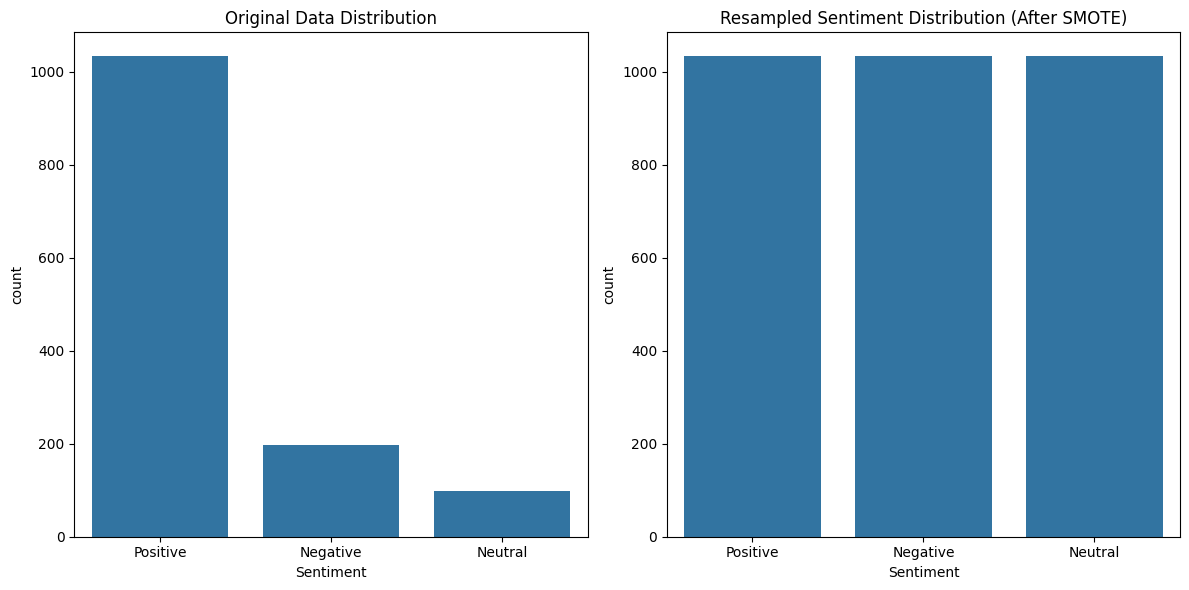

In [20]:
# Original Data Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=df['Sentiment'])
plt.title('Original Data Distribution')

# Resampling with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_matrix, df['Sentiment'])

# Feature Scaling for resampled data
scaler_resampled = StandardScaler(with_mean=False)
X_resampled = scaler_resampled.fit_transform(X_resampled)

# Resampled Data Histogram
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Resampled Sentiment Distribution (After SMOTE)')

plt.tight_layout()
plt.show()

In [21]:
# Fit the models on the resampled training data
randomized_rf_resampled = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=20, cv=5, random_state=42, n_jobs=-1)
randomized_rf_resampled.fit(X_resampled, y_resampled)

lr_resampled = LogisticRegression(solver='lbfgs', max_iter=6000)
lr_resampled.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=6000)

## Methods After Resampling

In [25]:
# Gaussian Naive Bayes
gnb_resampled = GaussianNB()
scores_gnb_resampled = cross_val_score(gnb_resampled, X_resampled, y_resampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Support Vector Machines
svm_resampled = SVC()
scores_svm_resampled = cross_val_score(svm_resampled, X_resampled, y_resampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# AdaBoost
adaboost_resampled = AdaBoostClassifier()
scores_adaboost_resampled = cross_val_score(adaboost_resampled, X_resampled, y_resampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Neural Network
nn_resampled = MLPClassifier(max_iter=1000)
scores_nn_resampled = cross_val_score(nn_resampled, X_resampled, y_resampled, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

# Step 6 : Testing

## The Classification Report:

In [35]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# Assuming you have gnb, svm, adaboost, nn, gnb_resampled, svm_resampled, adaboost_resampled, nn_resampled defined

# Before Resampling
y_pred_gnb = cross_val_predict(gnb, X_matrix, df['Sentiment'], cv=5)
y_pred_svm = cross_val_predict(svm, X_matrix, df['Sentiment'], cv=5)
y_pred_adaboost = cross_val_predict(adaboost, X_matrix, df['Sentiment'], cv=5)
y_pred_nn = cross_val_predict(nn, X_matrix, df['Sentiment'], cv=5)

# After Resampling
y_pred_gnb_resampled = cross_val_predict(gnb_resampled, X_resampled, y_resampled, cv=5)
y_pred_svm_resampled = cross_val_predict(svm_resampled, X_resampled, y_resampled, cv=5)
y_pred_adaboost_resampled = cross_val_predict(adaboost_resampled, X_resampled, y_resampled, cv=5)
y_pred_nn_resampled = cross_val_predict(nn_resampled, X_resampled, y_resampled, cv=5)

# Display the classification report for resampled data
print("Before Resampling:")
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(df['Sentiment'], y_pred_gnb))

print("Support Vector Machines Classification Report:")
print(classification_report(df['Sentiment'], y_pred_svm))

print("AdaBoost Classification Report:")
print(classification_report(df['Sentiment'], y_pred_adaboost))

print("Neural Network Classification Report:")
print(classification_report(df['Sentiment'], y_pred_nn))

print("\nAfter Resampling:")
print("Gaussian Naive Bayes Classification Report (Resampled):")
print(classification_report(y_resampled, y_pred_gnb_resampled))

print("Support Vector Machines Classification Report (Resampled):")
print(classification_report(y_resampled, y_pred_svm_resampled))

print("AdaBoost Classification Report (Resampled):")
print(classification_report(y_resampled, y_pred_adaboost_resampled))

print("Neural Network Classification Report (Resampled):")
print(classification_report(y_resampled, y_pred_nn_resampled))

Before Resampling:
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.28      0.44      0.34       197
     Neutral       0.12      0.28      0.16        99
    Positive       0.85      0.64      0.73      1033

    accuracy                           0.59      1329
   macro avg       0.42      0.46      0.41      1329
weighted avg       0.71      0.59      0.63      1329

Support Vector Machines Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      0.11      0.20       197
     Neutral       0.00      0.00      0.00        99
    Positive       0.79      1.00      0.88      1033

    accuracy                           0.79      1329
   macro avg       0.58      0.37      0.36      1329
weighted avg       0.76      0.79      0.72      1329

AdaBoost Classification Report:
              precision    recall  f1-score   support

    Negative       0.33      0.14      0.

c:\Users\Maha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Maha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Maha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    Negative       0.89      0.93      0.91      1033
     Neutral       0.91      0.96      0.93      1033
    Positive       0.95      0.85      0.90      1033

    accuracy                           0.91      3099
   macro avg       0.92      0.91      0.91      3099
weighted avg       0.92      0.91      0.91      3099

AdaBoost Classification Report (Resampled):
              precision    recall  f1-score   support

    Negative       0.69      0.73      0.71      1033
     Neutral       0.77      0.73      0.75      1033
    Positive       0.69      0.69      0.69      1033

    accuracy                           0.72      3099
   macro avg       0.72      0.72      0.72      3099
weighted avg       0.72      0.72      0.72      3099

Neural Network Classification Report (Resampled):
              precision    recall  f1-score   support

    Negative       0.83      0.98      0.90      1033
     Neutral       0.88      0.98  